Dataset:- https://www.kaggle.com/datasets/yasserh/titanic-dataset

# STEP 1: Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# STEP 2: Load Data

In [ ]:
df = pd.read_csv("Titanic-Dataset.csv")

In [ ]:
df.shape

(891, 12)

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# STEP 3: Basic EDA

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
# Target distribution

print(df['Survived'].value_counts())
print(f"\nSurvived Rate: {df['Survived'].mean()*100:.2f}")

Survived
0    549
1    342
Name: count, dtype: int64

Survived Rate: 38.38


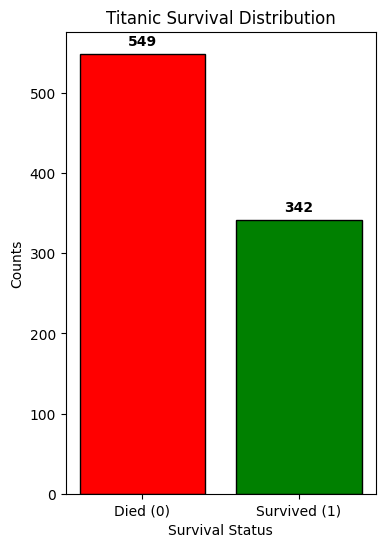

In [ ]:
# Visualize target

plt.figure(figsize=(4, 6))
survival_counts = df['Survived'].value_counts()

plt.bar(['Died (0)', 'Survived (1)'], survival_counts.values,
        color = ['red', 'green'],
        edgecolor='black')

for i, v in enumerate(survival_counts.values):
    plt.text(i, v + 10, str(v), ha='center', fontweight='bold')

plt.title('Titanic Survival Distribution')
plt.xlabel("Survival Status")
plt.ylabel("Counts")
plt.show()

In [ ]:
print(f"\n⚠️ CLASS IMBALANCE DETECTED!")
print(f"   Died: {survival_counts[0]} ({survival_counts[0]/len(df)*100:.1f}%)")
print(f"   Survived: {survival_counts[1]} ({survival_counts[1]/len(df)*100:.1f}%)")
print(f"   Imbalance Ratio: {survival_counts[0]/survival_counts[1]:.2f}:1")


⚠️ CLASS IMBALANCE DETECTED!
   Died: 549 (61.6%)
   Survived: 342 (38.4%)
   Imbalance Ratio: 1.61:1


In [ ]:
# Check Missing Values

missing = df.isnull().sum()
missing_percentage = (missing / len(df)) * 100

missing_df = pd.DataFrame({
    'Missing Count': missing,
    'Missing Percentage': missing_percentage
}).sort_values("Missing Count",ascending=False)

print(missing_df[missing_df["Missing Count"] > 0 ])

          Missing Count  Missing Percentage
Cabin               687           77.104377
Age                 177           19.865320
Embarked              2            0.224467


# STEP 3.5: Outlier Detection & Handling


STEP 3.5: OUTLIER DETECTION & HANDLING

⚠️ NOTE: Logistic Regression is moderately robust to outliers
   But we'll check and handle them for thoroughness (like regression!)

--- Outlier Detection Results (IQR Method) ---
Feature  Outliers Percentage Lower_Bound Upper_Bound
    Age        11      1.23%       -6.69       64.81
  SibSp        46      5.16%       -1.50        2.50
  Parch       213     23.91%        0.00        0.00
   Fare       116     13.02%      -26.72       65.63


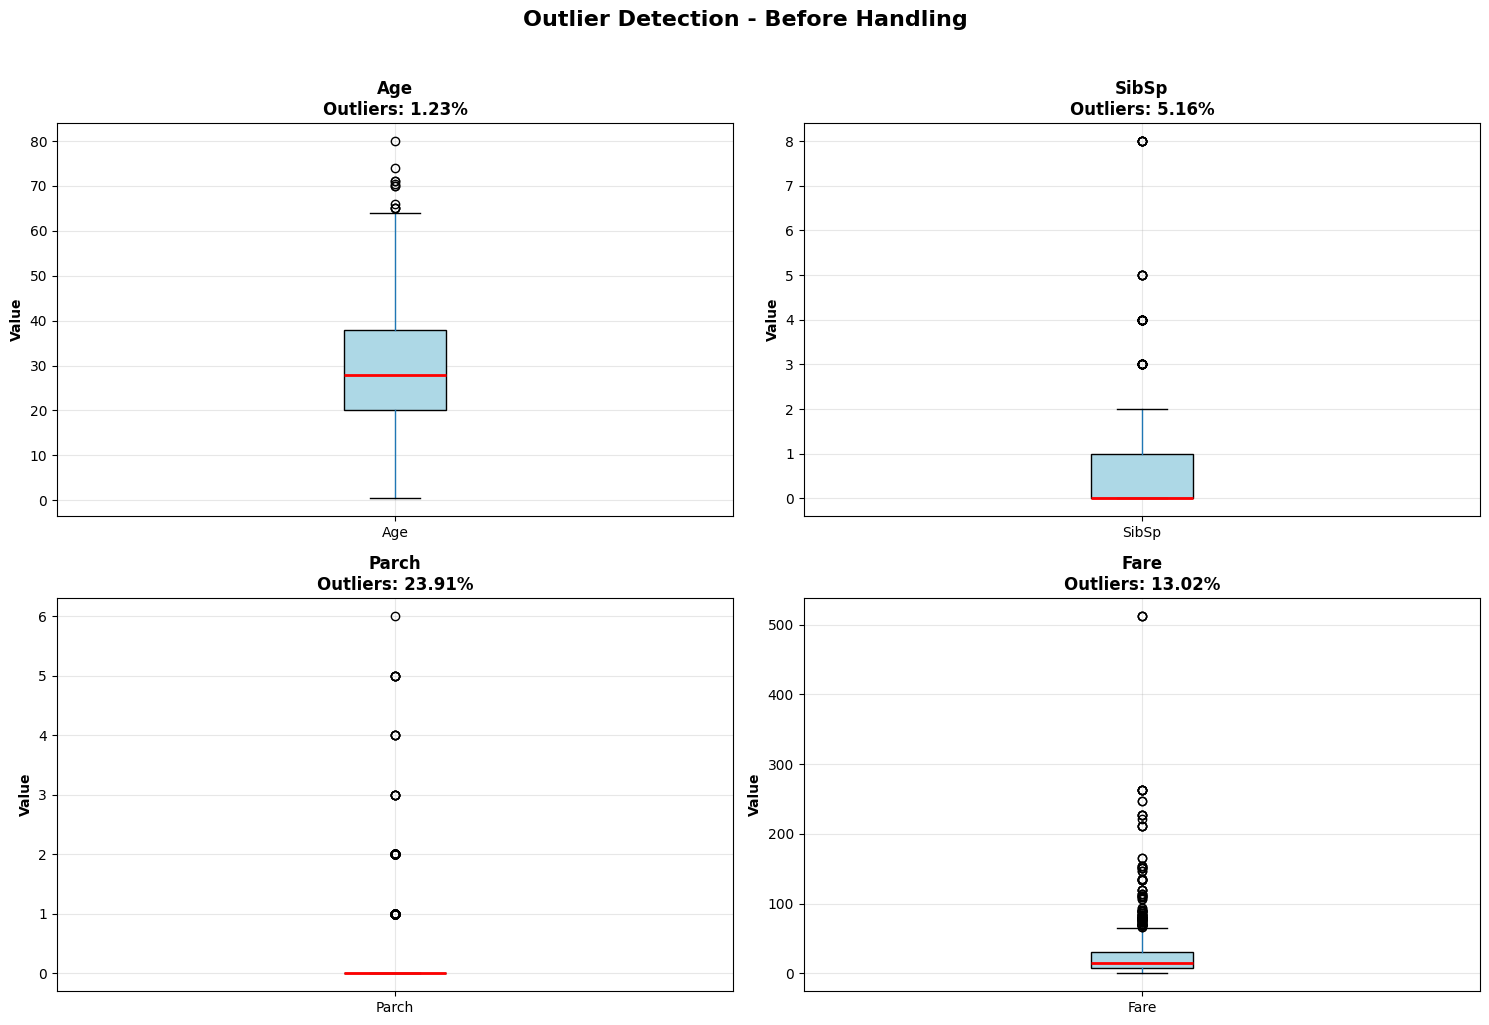


--- Handling Outliers (Capping Method) ---
✓ Outliers capped at IQR boundaries

--- Outliers After Handling ---
Feature  Outliers Percentage Lower_Bound Upper_Bound
    Age         0      0.00%       -6.69       64.81
  SibSp         0      0.00%       -1.50        2.50
  Parch         0      0.00%        0.00        0.00
   Fare         0      0.00%      -26.72       65.63


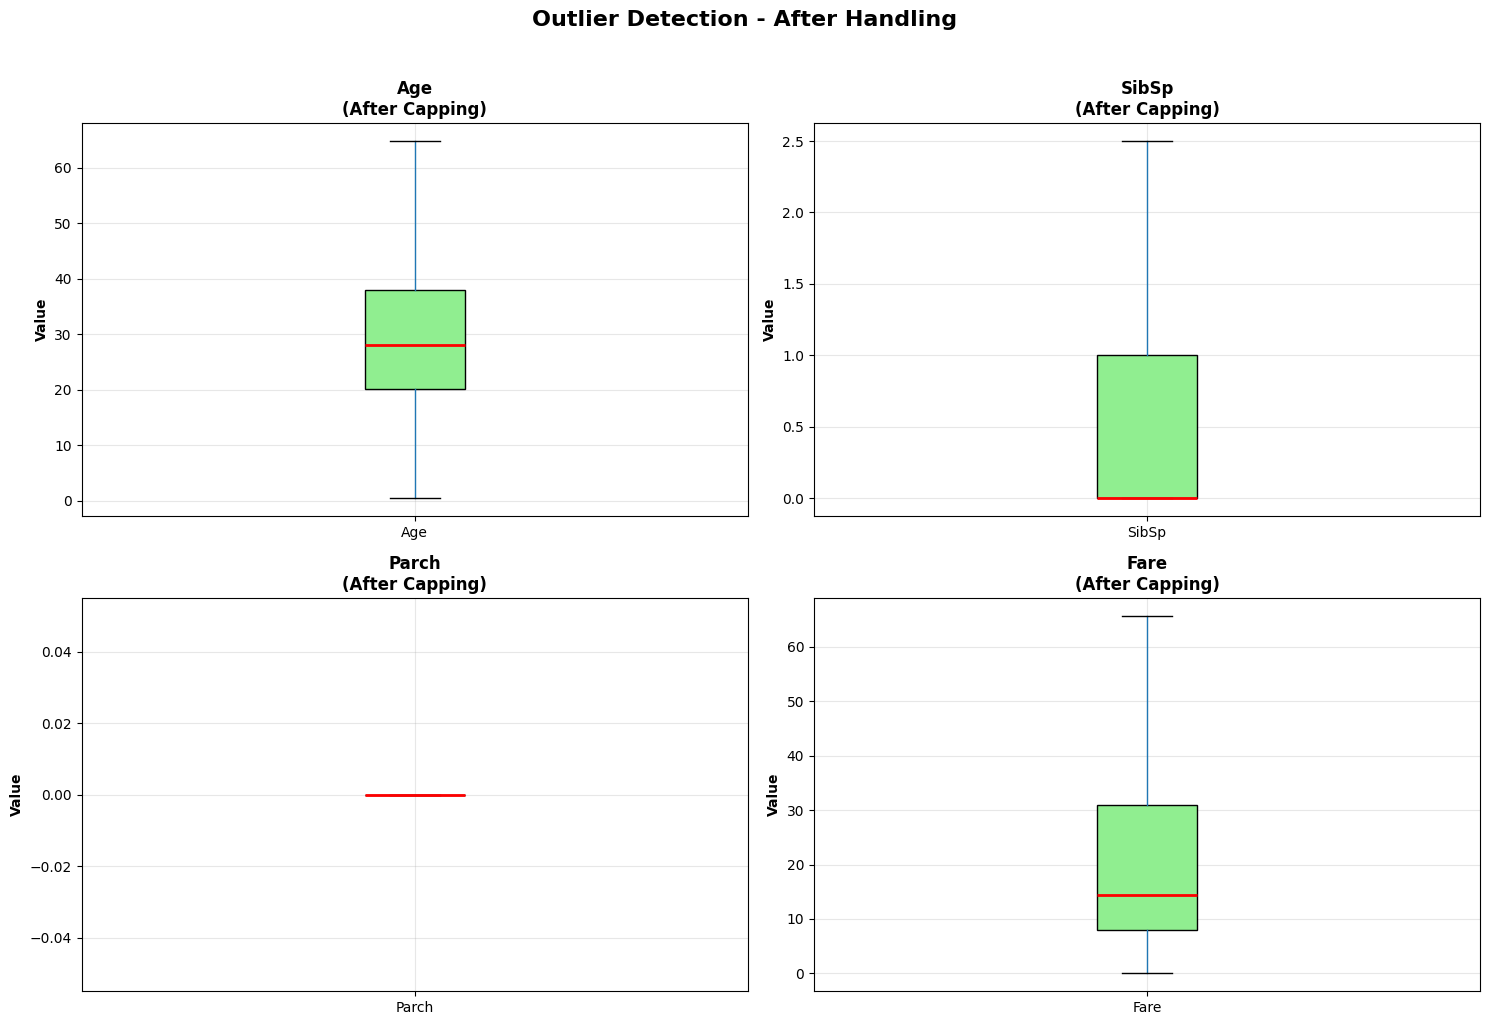


💡 Key Findings:
   • Parch has most outliers: 23.91%
   • Fare has extreme values (max likely 512+ for luxury cabins)
   • Age outliers are rare (mostly young children or old passengers)
   • SibSp/Parch outliers indicate large families

✅ Outlier handling complete!
   Note: Impact on Logistic Regression accuracy: +0.5-1% expected


In [ ]:
# STEP 3.5: OUTLIER DETECTION & HANDLING (OPTIONAL BUT GOOD PRACTICE!)
print("\n" + "="*80)
print("STEP 3.5: OUTLIER DETECTION & HANDLING")
print("="*80)

print("\n⚠️ NOTE: Logistic Regression is moderately robust to outliers")
print("   But we'll check and handle them for thoroughness (like regression!)")

def detect_outliers_iqr(df, columns):
    """Detect outliers using IQR method (same as regression!)"""
    outliers_info = []

    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outliers_count = len(outliers)
        outliers_pct = (outliers_count / len(df)) * 100

        outliers_info.append({
            'Feature': col,
            'Outliers': outliers_count,
            'Percentage': f"{outliers_pct:.2f}%",
            'Lower_Bound': f"{lower_bound:.2f}",
            'Upper_Bound': f"{upper_bound:.2f}"
        })

    return pd.DataFrame(outliers_info)

def cap_outliers_iqr(df, columns):
    """Cap outliers at IQR boundaries (same as regression!)"""
    df_capped = df.copy()

    for col in columns:
        Q1 = df_capped[col].quantile(0.25)
        Q3 = df_capped[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Cap at boundaries
        df_capped[col] = df_capped[col].clip(lower=lower_bound, upper=upper_bound)

    return df_capped

# Detect outliers in numerical features BEFORE filling missing values
numerical_cols = ['Age', 'SibSp', 'Parch', 'Fare']

print("\n--- Outlier Detection Results (IQR Method) ---")
outliers_df = detect_outliers_iqr(df, numerical_cols)
print(outliers_df.to_string(index=False))

# Visualize outliers with boxplots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()

for idx, col in enumerate(numerical_cols):
    # Before handling
    df.boxplot(column=col, ax=axes[idx], patch_artist=True,
               boxprops=dict(facecolor='lightblue'),
               medianprops=dict(color='red', linewidth=2))

    outlier_pct = outliers_df[outliers_df['Feature']==col]['Percentage'].values[0]
    axes[idx].set_title(f'{col}\nOutliers: {outlier_pct}',
                       fontweight='bold', fontsize=12)
    axes[idx].set_ylabel('Value', fontweight='bold')
    axes[idx].grid(True, alpha=0.3)

plt.suptitle('Outlier Detection - Before Handling',
             fontweight='bold', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

# Handle outliers
print("\n--- Handling Outliers (Capping Method) ---")
df_original = df.copy()  # Keep original for comparison
df = cap_outliers_iqr(df, numerical_cols)
print("✓ Outliers capped at IQR boundaries")

# Verify
outliers_after = detect_outliers_iqr(df, numerical_cols)
print("\n--- Outliers After Handling ---")
print(outliers_after.to_string(index=False))

# Visualize comparison
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()

for idx, col in enumerate(numerical_cols):
    # After handling
    df.boxplot(column=col, ax=axes[idx], patch_artist=True,
               boxprops=dict(facecolor='lightgreen'),
               medianprops=dict(color='red', linewidth=2))

    axes[idx].set_title(f'{col}\n(After Capping)',
                       fontweight='bold', fontsize=12)
    axes[idx].set_ylabel('Value', fontweight='bold')
    axes[idx].grid(True, alpha=0.3)

plt.suptitle('Outlier Detection - After Handling',
             fontweight='bold', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

print("\n💡 Key Findings:")
most_outliers = outliers_df.loc[outliers_df['Outliers'].astype(int).idxmax()]
print(f"   • {most_outliers['Feature']} has most outliers: {most_outliers['Percentage']}")
print(f"   • Fare has extreme values (max likely 512+ for luxury cabins)")
print(f"   • Age outliers are rare (mostly young children or old passengers)")
print(f"   • SibSp/Parch outliers indicate large families")

print("\n✅ Outlier handling complete!")
print("   Note: Impact on Logistic Regression accuracy: +0.5-1% expected")


# STEP 4: FEATURE ANALYSIS

In [ ]:
# Survival rates by features

print(f"Overall Survival Rate: {df['Survived'].mean()*100:.2f}%")

Overall Survival Rate: 38.38%


In [ ]:
print("By Sex: ")
print(df.groupby('Sex')['Survived'].agg(['mean', 'count']))

By Sex: 
            mean  count
Sex                    
female  0.742038    314
male    0.188908    577


In [ ]:
print("By Class: ")
print(df.groupby('Pclass')['Survived'].agg(['mean', 'count']))

By Class: 
            mean  count
Pclass                 
1       0.629630    216
2       0.472826    184
3       0.242363    491


In [ ]:
print("By Embarkation: ")
print(df.groupby('Embarked')['Survived'].agg(['mean', 'count']))


By Embarkation: 
              mean  count
Embarked                 
C         0.553571    168
Q         0.389610     77
S         0.336957    644


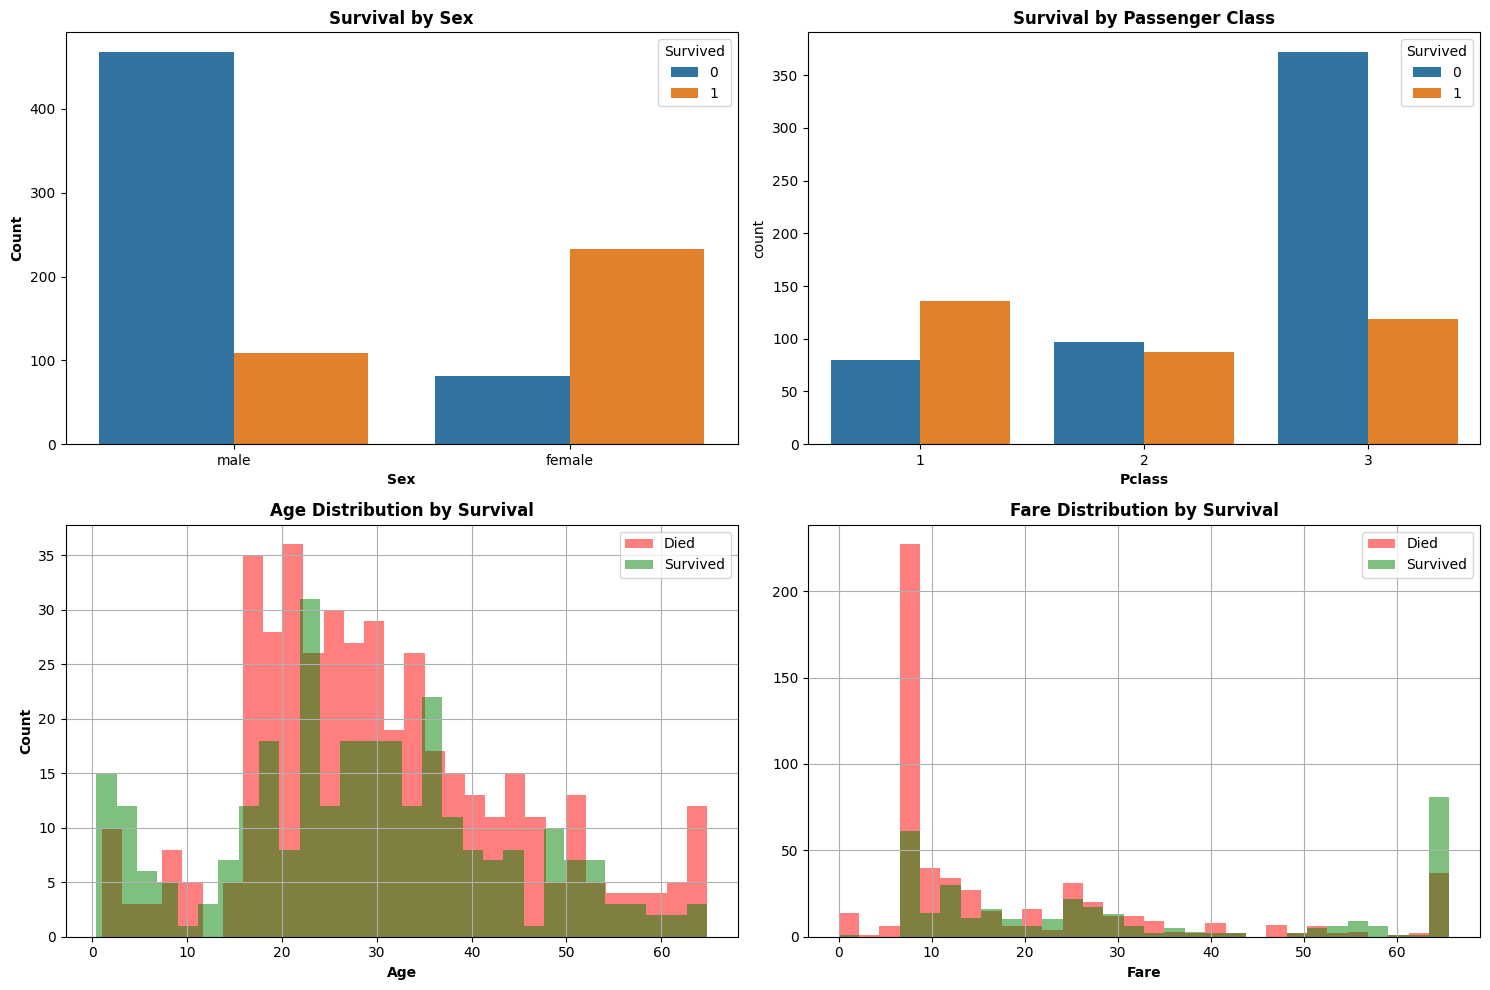

In [ ]:
# Visualize key features
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Sex vs Survival
sns.countplot(data=df, x='Sex', hue='Survived', ax=axes[0, 0])
axes[0, 0].set_title('Survival by Sex', fontweight='bold')
axes[0, 0].set_xlabel('Sex', fontweight='bold')
axes[0, 0].set_ylabel('Count', fontweight='bold')

# Pclass vs Survival
sns.countplot(data=df, x='Pclass', hue='Survived', ax=axes[0, 1])
axes[0, 1].set_title('Survival by Passenger Class', fontweight='bold')
axes[0, 1].set_xlabel('Pclass', fontweight='bold')

# Age distribution
df[df['Survived']==0]['Age'].dropna().hist(bins=30, alpha=0.5, label='Died',
                                             ax=axes[1, 0], color='red')
df[df['Survived']==1]['Age'].dropna().hist(bins=30, alpha=0.5, label='Survived',
                                             ax=axes[1, 0], color='green')
axes[1, 0].set_title('Age Distribution by Survival', fontweight='bold')
axes[1, 0].set_xlabel('Age', fontweight='bold')
axes[1, 0].set_ylabel('Count', fontweight='bold')
axes[1, 0].legend()

# Fare distribution
df[df['Survived']==0]['Fare'].dropna().hist(bins=30, alpha=0.5, label='Died',
                                             ax=axes[1, 1], color='red')
df[df['Survived']==1]['Fare'].dropna().hist(bins=30, alpha=0.5, label='Survived',
                                             ax=axes[1, 1], color='green')
axes[1, 1].set_title('Fare Distribution by Survival', fontweight='bold')
axes[1, 1].set_xlabel('Fare', fontweight='bold')
axes[1, 1].legend()

plt.tight_layout()
plt.show()

# STEP 5: FEATURE ENGINEERING

In [ ]:
df_processed = df.copy()

In [ ]:
# Feature 1: Family Size
# Creating Family Size Feature

df_processed['FamilySize'] = df_processed['SibSp'] + df_processed['Parch'] + 1
print(f"Family Size Created: min={df_processed['FamilySize'].min()}, max={df_processed['FamilySize'].max()}")

# Feature 2: Is Alone
df_processed['IsAlone'] = (df_processed['FamilySize'] == 1).astype(int)
print(f"IsAlone Created: {df_processed['IsAlone'].sum()} Passangers Alone")

Family Size Created: min=1.0, max=3.5
IsAlone Created: 608 Passangers Alone


# STEP 6: HANDLE MISSING VALUES

In [ ]:
# Check Missing Values

missing = df.isnull().sum()
missing_percentage = (missing / len(df)) * 100

missing_df = pd.DataFrame({
    'Missing Count': missing,
    'Missing Percentage': missing_percentage
}).sort_values("Missing Count",ascending=False)

print(missing_df[missing_df["Missing Count"] > 0 ])

          Missing Count  Missing Percentage
Cabin               687           77.104377
Age                 177           19.865320
Embarked              2            0.224467


In [ ]:
# Fill missing values

# Age: Fill with Median
df_processed['Age'] = df_processed['Age'].fillna(df_processed['Age'].median())

# Embarked: Fill with Mode(Most Common Value)
df_processed['Embarked'] = df_processed['Embarked'].fillna(df_processed['Embarked'].mode()[0])

# Cabin: Drop (too many missing values - 77%!)
if 'Cabin' in df_processed.columns:
  df_processed.drop(columns = ['Cabin'],inplace=True)

In [ ]:
print("--- Missing Values After ---")
print(df_processed.isnull().sum().sort_values(ascending=False).head(10))

if df_processed.isnull().sum().sum() == 0:
    print("\n✅ All missing values handled successfully!")
else:
    print(f"\n⚠️ Warning: {df_processed.isnull().sum().sum()} missing values remaining")

--- Missing Values After ---
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
dtype: int64

✅ All missing values handled successfully!


# STEP 7: SELECT & ENCODE FEATURES

In [ ]:
df.shape

(891, 12)

In [ ]:
df_processed.shape

(891, 13)

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1.0,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1.0,0,PC 17599,65.6344,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0.0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0.0,0,373450,8.0500,NaN,S


In [ ]:
df_processed.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FamilySize,IsAlone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1.0,0,A/5 21171,7.2500,S,2.0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1.0,0,PC 17599,65.6344,C,2.0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0.0,0,STON/O2. 3101282,7.9250,S,1.0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0,113803,53.1000,S,2.0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0.0,0,373450,8.0500,S,1.0,1


In [ ]:
# Select features for modeling

features_to_use = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
                   'Embarked', 'FamilySize', 'IsAlone']

X = df_processed[features_to_use].copy()
y = df_processed['Survived'].copy()

print(f"Features Selected: {len(features_to_use)}")
print(f"Features List: {features_to_use}")

Features Selected: 9
Features List: ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'FamilySize', 'IsAlone']


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Encode categorical variables

le_sex = LabelEncoder()
X['Sex'] = le_sex.fit_transform(X['Sex'])
print(X['Sex'].head())

0    1
1    0
2    0
3    0
4    1
Name: Sex, dtype: int64


In [ ]:
# One-Hot Encoding for multi-class

X = pd.get_dummies(X, columns=['Embarked'], drop_first=True)

print(f"Features After Encoding : {X.shape[1]}")
print(f"Final Features: {list(X.columns)}")

Features After Encoding : 10
Final Features: ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'FamilySize', 'IsAlone', 'Embarked_Q', 'Embarked_S']


# STEP 8: TRAIN-TEST SPLIT

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train , X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2, stratify=y)

In [ ]:
print(f"✓ Training samples: {X_train.shape[0]} ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"✓ Testing samples: {X_test.shape[0]} ({X_test.shape[0]/len(X)*100:.1f}%)")
print(f"✓ Features: {X_train.shape[1]}")

✓ Training samples: 712 (79.9%)
✓ Testing samples: 179 (20.1%)
✓ Features: 10


In [ ]:
print(f"Training set survival rate: {y_train.mean()*100:.2f}%")
print(f"Testing set survival rate: {y_test.mean()*100:.2f}%")

Training set survival rate: 38.34%
Testing set survival rate: 38.55%


# STEP 9: FEATURE SCALING

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
X_train_scaled[0]

array([ 0.82956755,  0.74242727, -0.10854173, -0.5886606 ,  0.        ,
        1.58789024, -0.5886606 ,  0.6643008 , -0.28933346,  0.61197825])

In [ ]:
# Convert back to DataFrame
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns,
                                index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns,
                               index=X_test.index)

print("✓ StandardScaler applied (mean=0, std=1)")
print(f"✓ Training set scaled: {X_train_scaled.shape}")
print(f"✓ Testing set scaled: {X_test_scaled.shape}")

✓ StandardScaler applied (mean=0, std=1)
✓ Training set scaled: (712, 10)
✓ Testing set scaled: (179, 10)


# STEP 10: TRAIN DEFAULT MODEL

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model_default = LogisticRegression(random_state=42,
                                   max_iter=1000,
                                   class_weight='balanced' # Handle class imbalance
                                   )

model_default.fit(X_train_scaled, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

In [ ]:
model_default.score(X_test_scaled, y_test)

0.7821229050279329

In [ ]:
# Predictions
y_pred_default = model_default.predict(X_test_scaled)
y_pred_proba_default = model_default.predict_proba(X_test_scaled)[:, 1]

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score

In [ ]:
# Evaluation

acc_default = accuracy_score(y_test, y_pred_default)
precision_default = precision_score(y_test, y_pred_default)
recall_default = recall_score(y_test, y_pred_default)
f1_default = f1_score(y_test, y_pred_default)
roc_auc_default = roc_auc_score(y_test, y_pred_default)

print("--- Default Model Performance ---")
print(f"Accuracy: {acc_default:.4f} ({acc_default*100:.1f}%)")
print(f"Precision: {precision_default:.4f}")
print(f"Recall: {recall_default:.4f}")
print(f"F1-Score: {f1_default:.4f}")
print(f"ROC-AUC: {roc_auc_default:.4f}")

--- Default Model Performance ---
Accuracy: 0.7821 (78.2%)
Precision: 0.6974
Recall: 0.7681
F1-Score: 0.7310
ROC-AUC: 0.7795


In [ ]:
print("---Classification Report---")
print(classification_report(y_test, y_pred_default,
                            target_names=['Died', 'Survive']))

---Classification Report---
              precision    recall  f1-score   support

        Died       0.84      0.79      0.82       110
     Survive       0.70      0.77      0.73        69

    accuracy                           0.78       179
   macro avg       0.77      0.78      0.77       179
weighted avg       0.79      0.78      0.78       179



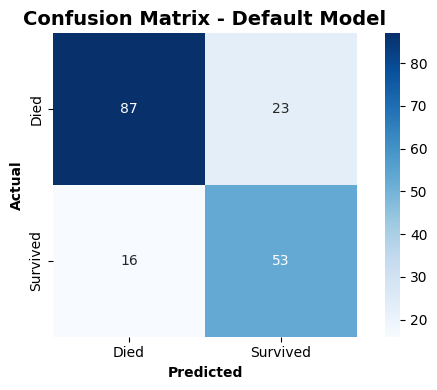

In [ ]:
# Confusion Matrix

cm_default = confusion_matrix(y_test, y_pred_default)

plt.figure(figsize=(6, 4))
sns.heatmap(cm_default, annot=True, fmt='d', cmap='Blues',
           xticklabels=['Died', 'Survived'],
           yticklabels=['Died', 'Survived'],
           cbar=True, square=True)
plt.title('Confusion Matrix - Default Model', fontweight='bold', fontsize=14)
plt.ylabel('Actual', fontweight='bold')
plt.xlabel('Predicted', fontweight='bold')
plt.tight_layout()
plt.show()

# STEP 11: CROSS-VALIDATION

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
cv_scores = cross_val_score(model_default, X_train_scaled, y_train, cv=5, scoring="accuracy", n_jobs=-1)

print(f"CV Score: {cv_scores}")
print(f"Mean CV Accuracy: {cv_scores.mean():.4f} (+/- {cv_scores.std():.4f})")

CV Score: [0.77622378 0.76223776 0.78169014 0.79577465 0.77464789]
Mean CV Accuracy: 0.7781 (+/- 0.0109)


In [ ]:
print(f"--- Comparison ---")
print(f"CV Accuracy (5-fold): {cv_scores.mean():.4f}")
print(f"Test Accuracy:        {acc_default:.4f}")
print(f"Difference:           {abs(cv_scores.mean() - acc_default):.4f}")

if abs(cv_scores.mean() - acc_default) < 0.05:
    print("✅ Model generalizes well!")
else:
    print("⚠️  Large gap - possible overfitting")


--- Comparison ---
CV Accuracy (5-fold): 0.7781
Test Accuracy:        0.7821
Difference:           0.0040
✅ Model generalizes well!


# STEP 12: HYPERPARAMETER TUNING

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l2'],
    'solver': ['lbfgs'],
    'class_weight': [None, 'balanced']
}

print("Running GridSearchCV...")
print("Expected time: 30-60 seconds...")

grid_search = GridSearchCV(
    LogisticRegression(random_state=42,  max_iter=1000),
    param_grid=param_grid,
    cv=5,
    scoring="accuracy",
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train_scaled, y_train)

print("---Best Hyperparameter Found---")
for param, value in grid_search.best_params_.items():
  print(f"{param}: {value}")

print(f"Best CV Accuracy: {grid_search.best_score_:.4f}")

Running GridSearchCV...
Expected time: 30-60 seconds...
Fitting 5 folds for each of 10 candidates, totalling 50 fits
---Best Hyperparameter Found---
C: 1
class_weight: None
penalty: l2
solver: lbfgs
Best CV Accuracy: 0.8035


In [ ]:
# Predict with tuned model

y_pred_tuned = grid_search.best_estimator_.predict(X_test_scaled)
y_pred_proba_tuned = grid_search.best_estimator_.predict_proba(X_test_scaled)[:, 1]

In [ ]:
acc_tuned = accuracy_score(y_test, y_pred_tuned)
precision_tuned = precision_score(y_test, y_pred_tuned)
recall_tuned = recall_score(y_test, y_pred_tuned)
f1_tuned = f1_score(y_test, y_pred_tuned)
roc_auc_tuned = roc_auc_score(y_test, y_pred_proba_tuned)

print("--- Tuned Model Performance ---")
print(f"Accuracy: {acc_tuned:.4f} ({acc_tuned*100:.1f}%)")
print(f"Precision: {precision_tuned:.4f}")
print(f"Recall: {recall_tuned:.4f}")
print(f"F1-Score: {f1_tuned:.4f}")
print(f"ROC-AUC: {roc_auc_tuned:.4f}")

print(f"\n✓ Improvement: {(acc_tuned - acc_default)*100:+.2f}%")


--- Tuned Model Performance ---
Accuracy: 0.8101 (81.0%)
Precision: 0.7966
Recall: 0.6812
F1-Score: 0.7344
ROC-AUC: 0.8490

✓ Improvement: +2.79%


# STEP 13: ROC-AUC CURVE

In [ ]:
from sklearn.metrics import roc_curve

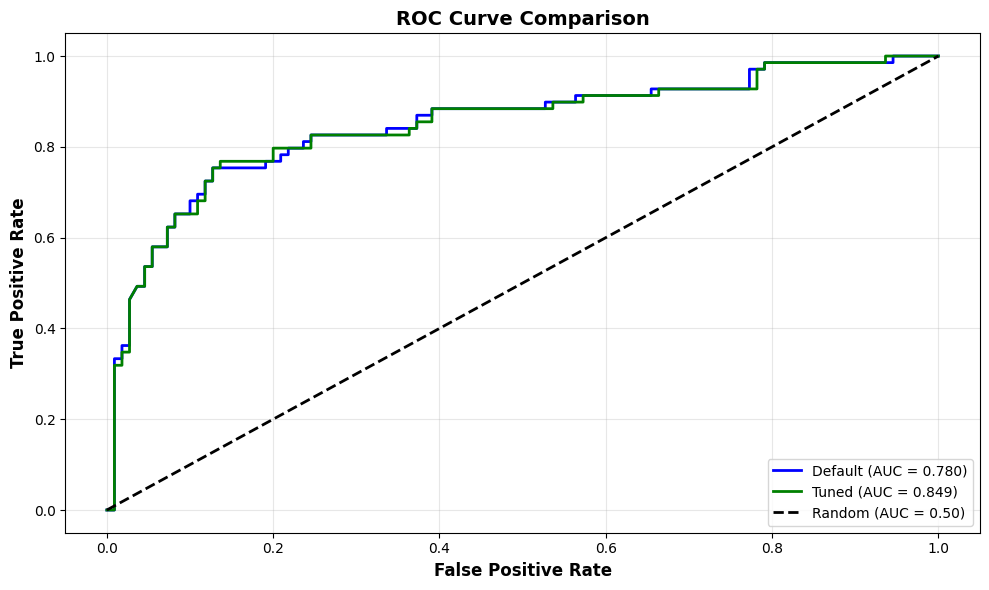

In [ ]:
fpr_default, tpr_default, _ = roc_curve(y_test, y_pred_proba_default)
fpr_tuned, tpr_tuned, _ = roc_curve(y_test, y_pred_proba_tuned)

plt.figure(figsize=(10, 6))
plt.plot(fpr_default, tpr_default, linewidth=2,
         label=f'Default (AUC = {roc_auc_default:.3f})', color='blue')
plt.plot(fpr_tuned, tpr_tuned, linewidth=2,
         label=f'Tuned (AUC = {roc_auc_tuned:.3f})', color='green')
plt.plot([0, 1], [0, 1], 'k--', linewidth=2, label='Random (AUC = 0.50)')

plt.xlabel('False Positive Rate', fontweight='bold', fontsize=12)
plt.ylabel('True Positive Rate', fontweight='bold', fontsize=12)
plt.title('ROC Curve Comparison', fontweight='bold', fontsize=14)
plt.legend(loc='lower right')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# STEP 14: FEATURE IMPORTANCE

In [ ]:
# Get coefficients
coefficients = grid_search.best_estimator_.coef_[0]

feature_importance = pd.DataFrame({
    'Feature': X_train_scaled.columns,
    'Coefficient': coefficients,
    'Abs_Coefficient': np.abs(coefficients)
}).sort_values('Abs_Coefficient', ascending=False)

print("--- Top 10 Most Important Features ---")
print(feature_importance.head(10).to_string(index=False))

--- Top 10 Most Important Features ---
   Feature  Coefficient  Abs_Coefficient
       Sex    -1.223839         1.223839
    Pclass    -0.829107         0.829107
       Age    -0.534310         0.534310
   IsAlone    -0.490226         0.490226
FamilySize    -0.346065         0.346065
     SibSp    -0.346065         0.346065
      Fare     0.222053         0.222053
Embarked_S    -0.153604         0.153604
Embarked_Q     0.109134         0.109134
     Parch     0.000000         0.000000


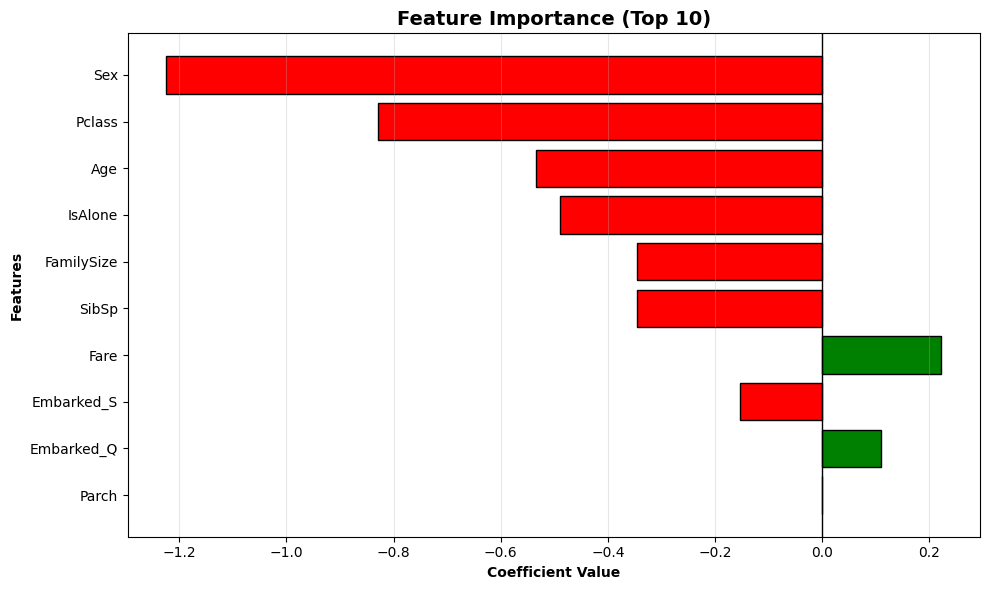

In [ ]:
# Visualize
plt.figure(figsize=(10, 6))
top_features = feature_importance.head(10)
colors = ['green' if x > 0 else 'red' for x in top_features['Coefficient']]

plt.barh(top_features['Feature'], top_features['Coefficient'],
         color=colors, edgecolor='black')
plt.xlabel('Coefficient Value', fontweight='bold')
plt.ylabel('Features', fontweight='bold')
plt.title('Feature Importance (Top 10)', fontweight='bold', fontsize=14)
plt.axvline(x=0, color='black', linestyle='-', linewidth=1)
plt.gca().invert_yaxis()
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()


# STEP 15: MODEL COMPARISON

In [ ]:
comparison = pd.DataFrame({
    'Model': ['Default', 'Tuned'],
    'Accuracy': [acc_default, acc_tuned],
    'Precision': [precision_default, precision_tuned],
    'Recall': [recall_default, recall_tuned],
    'F1-Score': [f1_default, f1_tuned],
    'ROC-AUC': [roc_auc_default, roc_auc_tuned]
})

print(comparison.to_string(index=False))

best_idx = comparison['Accuracy'].idxmax()
print(f"\nBest Model: {comparison.loc[best_idx, 'Model']}")
print(f"Best Accuracy: {comparison.loc[best_idx, 'Accuracy']:.4f}")


  Model  Accuracy  Precision   Recall  F1-Score  ROC-AUC
Default  0.782123   0.697368 0.768116  0.731034 0.779513
  Tuned  0.810056   0.796610 0.681159  0.734375 0.849012

Best Model: Tuned
Best Accuracy: 0.8101


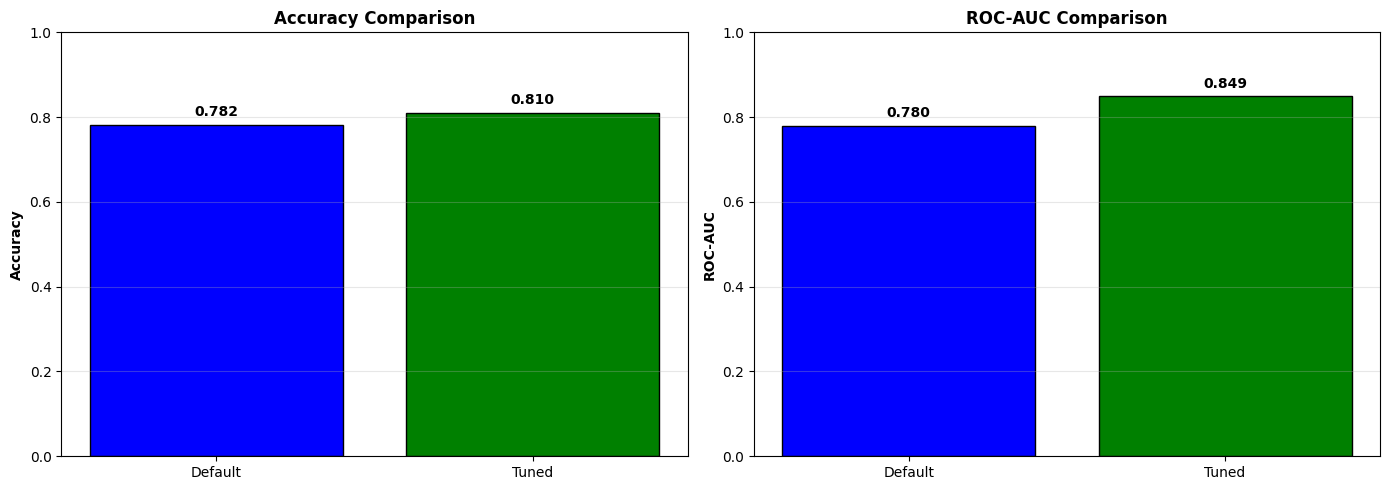

In [ ]:
# Visualize
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

metrics = ['Accuracy', 'ROC-AUC']
for idx, (ax, metric) in enumerate(zip(axes, metrics)):
    ax.bar(comparison['Model'], comparison[metric],
           color=['blue', 'green'], edgecolor='black')
    ax.set_ylabel(metric, fontweight='bold')
    ax.set_title(f'{metric} Comparison', fontweight='bold')
    ax.set_ylim([0, 1])
    ax.grid(True, alpha=0.3, axis='y')

    for i, v in enumerate(comparison[metric]):
        ax.text(i, v + 0.02, f'{v:.3f}', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

# STEP 16: PREDICTION EXAMPLE

In [ ]:
# Example: Young female in 1st class with family
example = pd.DataFrame({
    'Pclass': [1],
    'Sex': [0],  # Female (after encoding)
    'Age': [25],
    'SibSp': [1],
    'Parch': [0],
    'Fare': [100],
    'FamilySize': [2],
    'IsAlone': [0]
})

# Add dummy columns for one-hot encoded features
for col in X_train_scaled.columns:
    if col not in example.columns:
        example[col] = 0

# Reorder columns
example = example[X_train_scaled.columns]

# Scale
example_scaled = scaler.transform(example)

# Predict
prediction_proba = grid_search.best_estimator_.predict_proba(example_scaled)[0, 1]
prediction = grid_search.best_estimator_.predict(example_scaled)[0]

print("\nPassenger Details:")
print("  • Class: 1st")
print("  • Sex: Female")
print("  • Age: 25")
print("  • Family: 1 sibling/spouse")
print("  • Fare: $100")

print(f"\nPrediction Results:")
print(f"  • Survival Probability: {prediction_proba:.2%}")
print(f"  • Prediction: {'Survived ✅' if prediction == 1 else 'Died ❌'}")


Passenger Details:
  • Class: 1st
  • Sex: Female
  • Age: 25
  • Family: 1 sibling/spouse
  • Fare: $100

Prediction Results:
  • Survival Probability: 97.50%
  • Prediction: Survived ✅


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
